# previous work:

In [2]:
teachers = pd.read_csv('../data/teachers.csv')
students = pd.read_csv('../data/students.csv')
sessions = pd.read_csv('../data/sessions.csv')
schools = pd.read_csv('../data/schools.csv')
posts = pd.read_csv('../data/posts.csv')
planning_events = pd.read_csv('../data/planning_events.csv')
child_posts = pd.read_csv('../data/child_posts.csv')
classrooms = pd.read_csv('../data/classrooms.csv')
lesson_posts = pd.read_csv('../data/lesson_posts.csv')
parents = pd.read_csv('../data/parents.csv')
sessions['start_date'] = pd.to_datetime(sessions['start_date'])
sessions['stop_date'] = pd.to_datetime(sessions['stop_date'])
sessions['exists']=1
posts['exists']=1
# posts['date'] = pd.to_datetime(posts.date, errors='coerce')
posts['date'] = pd.to_datetime(posts.date, errors='coerce')
classrooms_merged = pd.read_csv('../data/classrooms_merged.csv')

/Users/macbookpro/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Sessions analysis

In [2]:
sessions.head()

,id,current,start_date,stop_date,name,school_id,inactive,exists
0,1,f,2012-01-03,2012-06-20,2011-12,2,f,1
1,2,f,2012-06-25,2012-08-17,Summer 2012,2,f,1
2,6,f,2013-09-01,2014-07-01,2013-14,3,f,1
3,3,f,2012-09-04,2013-06-19,2012-13,2,f,1
4,4,f,2012-09-01,2013-06-30,2012-13,3,f,1


In [3]:
# churners:
sum(sessions.groupby('school_id')['stop_date'].max()<pd.to_datetime('april 28, 2018'))

14

In [ ]:
sum(sessions['stop_date']<pd.to_datetime('april 28, 2018'))

1973

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(20,40))
point_pairs = [((sessions.start_date[i],sessions.stop_date[i]),(sessions.school_id[i],sessions.school_id[i])) for i in range(len(sessions))]
# point_pairs = [((sessions.start_date[i],sessions.stop_date[i]),(sessions.school_id[i],sessions.school_id[i])) for i in range(100)]
for x in point_pairs:
    ax.plot(x[0], x[1], alpha=.5)
ax.set_xlabel('start/stop date')
ax.set_ylabel('school_id')
ax.set_title('school_id start/stop dates')

Text(0.5,1,'school_id start/stop dates')

In [ ]:
sessions.start_date[0]

In [ ]:
sessions.groupby('start_date').sum().head(5)
sum_sessions_date_indexed = sessions.groupby('start_date').sum()
sum_sessions_date_indexed['exists'] = np.log(sum_sessions_date_indexed['exists'])
sum_sessions_date_indexed[sum_sessions_date_indexed['school_id']==465]['exists']
sum_sessions = sum_sessions_date_indexed.reset_index()
sum_sessions.head()

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(20,3))
ax.plot(sum_sessions[sum_sessions['school_id']==24]['start_date'], sum_sessions[sum_sessions['school_id']==24]['exists'])
sessions.describe()
print('max stop = ' + str(sessions.stop_date.max()))
print('max start = ' + str(sessions.start_date.max()))
print('min stop = ' + str(sessions.stop_date.min()))
print('min start = ' + str(sessions.start_date.min()))

In [ ]:
sessions.head(3)

In [ ]:
sessions_grouped = sessions[['start_date','school_id','exists']].groupby(['start_date','school_id']).sum().reset_index().head()
# sessions_grouped.set_index('start_date', inplace=True)
sessions_grouped.groupby('school_id')['exists'].plot(legend=True)

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(20,20))
ax.plot(sessions[['exists','start_date']].groupby('start_date').sum());

## Posts analysis

In [ ]:
posts.head(3)

In [ ]:
posts.describe()

In [ ]:
sorted_post_date = posts.date.sort_values()

In [ ]:
# # posts.date.dtypes
# # posts.date.apply(lambda x: not isinstance(x, pd.Timestamp))
# sorted_post_date.iloc[-170:]
# # posts.date.dtypes
# posts['date'] = pd.to_datetime(posts.date, errors='coerce')
# # len(posts.date)
# # posts.date>'2018-12-12'

In [ ]:
print(posts.date.max())
print(posts.date.min())

In [ ]:
# posts['exists']=1
# posts.head(3)

In [ ]:
posts[['date','classroom_id','exists']].groupby(['classroom_id', 'date']).sum().plot();

In [ ]:
posts[['date','classroom_id','exists']].groupby(['classroom_id', 'date']).sum()

In [ ]:
sum_post = posts[['date','classroom_id','exists']].groupby(['classroom_id', 'date']).sum()
sum_post['exists'] = np.log(sum_post['exists'])
sum_post = sum_post.reset_index()
sum_post_date_indexed = sum_post.copy()
sum_post_date_indexed.set_index('date',inplace=True)
# plt.plot(sum_post[sum_post['classroom_id']==1])
# plt.scatter(sum_post[sum_post['classroom_id']==1][date], sum_post[sum_post['classroom_id']==1]['exists'])

In [ ]:
sum_post[sum_post['classroom_id']==3]

In [ ]:
sum_post['classroom_id'].value_counts()[60:61]
sum_post.head()

In [ ]:
# plt.plot(sum_post[sum_post['classroom_id']==1]);
np.exp(5)

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(20,3))
ax[0].scatter(sum_post[sum_post['classroom_id']==77]['date'].values,sum_post[sum_post['classroom_id']==77]['exists'])
ax[1].plot(sum_post[sum_post['classroom_id']==77]['date'],sum_post[sum_post['classroom_id']==77]['exists']);
ax[0].set_title("Class 77 log(posts)")

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(20,3))
ax[0].scatter(sum_post[sum_post['classroom_id']==852]['date'].values,sum_post[sum_post['classroom_id']==852]['exists'])
ax[1].plot(sum_post[sum_post['classroom_id']==852]['date'],sum_post[sum_post['classroom_id']==852]['exists']);
ax[0].set_title("Class 852 log(posts)")

In [ ]:
for classroom_id in sum_post['classroom_id'].unique()[0:30]:
    fig, ax = plt.subplots(2,1, figsize=(20,3))
    ax[0].scatter(sum_post[sum_post['classroom_id']==classroom_id]['date'].values,sum_post[sum_post['classroom_id']==classroom_id]['exists'], s=6)
    ax[1].plot(sum_post[sum_post['classroom_id']==classroom_id]['date'],sum_post[sum_post['classroom_id']==classroom_id]['exists']);
    ax[0].set_title(f"Class {classroom_id} log(posts)")
    plt.show()

## Peek at all data:

In [ ]:
posts.head(3)

In [ ]:
planning_events.head(10)

In [ ]:
classrooms.head(10)

In [ ]:
len(classrooms.lesson_set_id.unique())

In [ ]:
classrooms.lesson_set_id.value_counts().head(5)

In [ ]:
len(classrooms)

In [ ]:
len(classrooms.id.unique())

In [ ]:
teachers.head(3)

In [ ]:
len(teachers.id.unique())

In [ ]:
sum(teachers.default_classroom_id.isna())

In [ ]:
sum(teachers.teacher=='f')

In [ ]:
len(teachers.default_classroom_id.unique())

In [ ]:
students.head()

In [ ]:
schools.head(5)

In [ ]:
lesson_posts.head(3)

In [ ]:
plt.hist(lesson_posts.groupby('lesson_id').count()['post_id'], bins=30);

In [ ]:
lesson_posts.groupby('lesson_id').count()['post_id'].describe()

In [ ]:
plt.hist(lesson_posts.groupby('post_id').count()['lesson_id'], bins=30);

In [ ]:
child_posts.head(3)

## Combine data into one dataframe for analysis:

In [2]:
posts = pd.read_csv('../data/posts.csv')
posts['exists']=1
posts['date'] = pd.to_datetime(posts.date, errors='coerce')

In [3]:
print(len(posts))
posts.head()

4584013


,id,date,classroom_id,picture_file_name,private,exists
0,4319418,2018-01-25,1684,NaN,f,1
1,4319419,2018-01-25,1684,NaN,f,1
2,4319420,2018-01-25,1684,NaN,f,1
3,4319421,2018-01-25,1684,NaN,f,1
4,4319422,2018-01-25,1684,NaN,f,1


In [4]:
classrooms_merged = classrooms.merge(posts,how='outer', left_on='id', right_on='classroom_id')
classrooms_merged['classroom_id']=classrooms_merged['id_x']
classrooms_merged = classrooms_merged.drop('id_x', axis=1)
classrooms_merged['post_id']=classrooms_merged['id_y']
classrooms_merged = classrooms_merged.drop('id_y', axis=1)
print(len(classrooms_merged))
classrooms_merged.head(3)

4585066


,school_id,lesson_set_id,inactive,classroom_type,date,classroom_id,picture_file_name,private,exists,post_id
0,855,1281,f,Primary,NaT,2650,NaN,NaN,NaN,NaN
1,48,126,t,Primary,2015-09-16,174,NaN,f,1.0,89168.0
2,48,126,t,Primary,2015-10-08,174,NaN,f,1.0,118933.0


In [5]:
children_per_post = child_posts.groupby('post_id').count()
children_per_post.describe()
children_per_post = children_per_post.reset_index()
children_per_post['children_per_post_aka_post_blast'] = children_per_post['child_id']
children_per_post = children_per_post.drop('child_id', axis=1)
children_per_post.head(3)

,post_id,children_per_post_aka_post_blast
0,6,2
1,7,1
2,10,1


In [6]:
classrooms_merged = classrooms_merged.merge(children_per_post, how='left', left_on='post_id', right_on='post_id')
print(len(classrooms_merged))
classrooms_merged.head(3)

4585066


,school_id,lesson_set_id,inactive,classroom_type,date,classroom_id,picture_file_name,private,exists,post_id,children_per_post_aka_post_blast
0,855,1281,f,Primary,NaT,2650,NaN,NaN,NaN,NaN,NaN
1,48,126,t,Primary,2015-09-16,174,NaN,f,1.0,89168,NaN
2,48,126,t,Primary,2015-10-08,174,NaN,f,1.0,118933,2.0


In [7]:
# not adding
posts_per_child = child_posts.groupby('child_id').count()
posts_per_child.describe()
posts_per_child.head(3)

,post_id
child_id,
1,172
2,132
4,899


In [8]:
posts_per_lesson = lesson_posts.groupby('lesson_id').count()
posts_per_lesson
print(len(posts_per_lesson))
posts_per_lesson = posts_per_lesson.reset_index()
posts_per_lesson['post_per_lesson_aka_popularity'] = posts_per_lesson['post_id']
posts_per_lesson = posts_per_lesson.drop('post_id', axis=1)
posts_per_lesson.head(3)


376224


,lesson_id,post_per_lesson_aka_popularity
0,1,172
1,2,132
2,4,899


In [9]:
classrooms_merged = classrooms_merged.merge(posts_per_lesson, how='left', left_on='lesson_set_id', right_on='lesson_id')
print(len(classrooms_merged))
classrooms_merged.head(3)

4585066


,school_id,lesson_set_id,inactive,classroom_type,date,classroom_id,picture_file_name,private,exists,post_id,children_per_post_aka_post_blast,lesson_id,post_per_lesson_aka_popularity
0,855,1281,f,Primary,NaT,2650,NaN,NaN,NaN,NaN,NaN,1281.0,18.0
1,48,126,t,Primary,2015-09-16,174,NaN,f,1.0,89168,NaN,126.0,78.0
2,48,126,t,Primary,2015-10-08,174,NaN,f,1.0,118933,2.0,126.0,78.0


In [10]:
classrooms.head(3)

,id,school_id,lesson_set_id,inactive,classroom_type
0,2650,855,1281,f,Primary
1,174,48,126,t,Primary
2,2645,862,1276,f,Lower Elementary


In [11]:
len(classrooms_merged.classroom_id.unique())

3643

In [12]:
len(teachers.default_classroom_id.unique())
len(teachers)

6622

In [13]:
len(teachers.school_id.unique())

729

376224


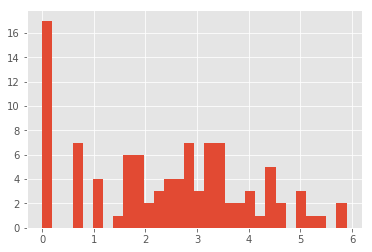

In [14]:
len(lesson_posts.lesson_id.unique())
len(lesson_posts.post_id.unique())
posts_per_lesson = lesson_posts.groupby('lesson_id').count()
print(len(posts_per_lesson))
plt.hist(np.log(posts_per_lesson.sample(100).values), bins=30);
posts_per_lesson.head(3)
posts_per_lesson.rename(index=str, columns={"post_id": "posts_per_lesson"});

In [15]:
classrooms_merged = classrooms_merged.merge(posts_per_lesson, left_on='lesson_set_id', right_index=True)
classrooms_merged.head(3)

,school_id,lesson_set_id,inactive,classroom_type,date,classroom_id,picture_file_name,private,exists,post_id_x,children_per_post_aka_post_blast,lesson_id,post_per_lesson_aka_popularity,post_id_y
0,855,1281,f,Primary,NaT,2650,NaN,NaN,NaN,NaN,NaN,1281.0,18.0,18
3340262,855,1281,f,Primary,NaT,2649,NaN,NaN,NaN,NaN,NaN,1281.0,18.0,18
1,48,126,t,Primary,2015-09-16,174,NaN,f,1.0,89168,NaN,126.0,78.0,78


In [16]:
# next time try merging first, then filter by time, then groupby and count
# We're going to have to merge by time soon.

In [17]:
classrooms_merged = classrooms_merged.merge(teachers, left_on='classroom_id', right_on='default_classroom_id')

In [18]:
teachers['teach_and_admin'] = (teachers['teacher']=='t') & (teachers['admin']=='t' )
teachers['is_teacher'] = teachers['teacher']=='t'
teachers['is_admin'] = teachers['admin']=='t'

In [19]:
teachers_per_class = teachers.groupby('default_classroom_id').sum()
teachers_per_class.head(3)

,id,school_id,teach_and_admin,is_teacher,is_admin
default_classroom_id,,,,,
1.0,252293,34,3.0,17.0,3.0
3.0,68,3,0.0,1.0,0.0
4.0,36555,9,0.0,2.0,1.0


In [20]:
# THIS IS ALMOST DEFINITELY DATA LEAKAGE:
classrooms_merged = classrooms_merged.merge(teachers, left_on='classroom_id', right_index=True)

In [21]:
students.head()

,child_id,classroom_id,current
0,997,72,f
1,13,1,f
2,2221,55,f
3,32489,1466,t
4,8388,60,f


In [22]:
len(students.child_id.unique())

59676

In [23]:
len(students.classroom_id.unique())

3066

In [24]:
current_students_per_class = students[students['current']=='t'].groupby('classroom_id').count()
current_students_per_class.drop('current', axis=1)
current_students_per_class.rename({'child_id': 'num_current_children'});

In [25]:
old_students_per_class = students[students['current']=='f'].groupby('classroom_id').count()
old_students_per_class.drop('current', axis=1)
old_students_per_class.rename({'child_id': 'num_old_children'});

In [26]:
classrooms_merged = classrooms_merged.merge(current_students_per_class, left_on='classroom_id', right_index=True)
classrooms_merged = classrooms_merged.merge(old_students_per_class, left_on='classroom_id', right_index=True)

In [27]:
classrooms_merged.head(3)

,school_id_x,lesson_set_id,inactive,classroom_type,date,classroom_id,picture_file_name,private,exists,post_id_x,...,default_classroom_id_y,teacher_y,admin_y,teach_and_admin,is_teacher,is_admin,child_id_x,current_x,child_id_y,current_y
2,48,126,f,Primary,2017-01-13,172,NaN,f,1.0,1.18005e+06,...,2479.0,t,f,False,True,False,27,27,38,38
3,48,126,f,Primary,2017-01-13,172,NaN,f,1.0,1.18005e+06,...,2479.0,t,f,False,True,False,27,27,38,38
4,48,126,f,Primary,2016-02-13,172,NaN,f,1.0,262186,...,2479.0,t,f,False,True,False,27,27,38,38


In [28]:
classrooms_merged.to_csv('../data/classrooms_merged.csv')

### NOT MERGED:

In [ ]:
posts_merge = posts_merge.merge(planning_events, how='left', left_on)
posts_merge.head(3)

In [ ]:
planning_events.child_id.value_counts().head(5)

In [ ]:
planning_events.head(5)

In [ ]:
#TODO: merge planning events totals according to time. 

## Combine planning_events into one dataframe for analysis:

In [ ]:
planning_events.created_at = pd.to_datetime(planning_events.created_at)

In [ ]:
planning_events['created_at'].apply(lambda x: isinstance(x, pd.Timestamp))

In [ ]:
len(planning_events.created_by_id.unique())

## Make hist of posts in last 30 days

In [ ]:
posts.head(3)

In [ ]:
plt.hist(np.log(num_posts_by_class['exists']), bins=100);

In [ ]:
plt.hist(num_posts_by_class)

### Num posts in the last X days

In [ ]:
def posts_since(posts,date):
    last_month_posts = posts[posts['date']>date].groupby('classroom_id').count()
    num_posts_by_class = posts.groupby('classroom_id').sum()
    last_month_posts_total= num_posts_by_class.join(last_month_posts, how='left', lsuffix='_num_posts_by_class', rsuffix='_last_month_posts')
    last_month_posts_total.loc[last_month_posts_total['id_last_month_posts'].isnull(),'exists_last_month_posts'] =0
    fig, ax = plt.subplots(1,1)
    ax.set_title(f'class posts since {date.date()}')
    ax.hist(last_month_posts_total['exists_last_month_posts'],bins=40)
    ax.set_ylabel("# of classes")
    ax.set_xlabel("# of posts")
    plt.show()
    
def log_posts_since(posts,date):
    last_month_posts = posts[posts['date']>date].groupby('classroom_id').count()
    num_posts_by_class = posts.groupby('classroom_id').sum()
    last_month_posts_total= num_posts_by_class.join(last_month_posts, how='left', lsuffix='_num_posts_by_class', rsuffix='_last_month_posts')
    last_month_posts_total.loc[last_month_posts_total['id_last_month_posts'].isnull(),'exists_last_month_posts'] =0
    fig, ax = plt.subplots(1,1)
    ax.set_title(f'class log(posts) since {date.date()}')
    ax.hist(np.log(last_month_posts_total['exists_last_month_posts']+1),bins=40)
    ax.set_ylabel("# of classes")
    ax.set_xlabel("log(#) of posts")
    plt.show()
posts_since(posts, pd.to_datetime("Feb 15 2018"))

In [ ]:
posts_since(posts, pd.to_datetime("Feb 15 2011"))
posts_since(posts, pd.to_datetime("Jan 15 2018"))
log_posts_since(posts, pd.to_datetime("jan 15 2018"))
log_posts_since(posts, pd.to_datetime("feb 15 2018"))

In [ ]:
def plot_posts_between(posts, date1, date2):
    print(sum((date1 < posts['date']) & (posts['date'] < date2)))
    last_month_posts = posts[(date1 < posts['date']) & (posts['date'] < date2)].groupby('classroom_id').count()
    num_posts_by_class = posts.groupby('classroom_id').sum()
    last_month_posts_total= num_posts_by_class.join(last_month_posts, how='left', lsuffix='_num_posts_by_class', rsuffix='_last_month_posts')
    last_month_posts_total.loc[last_month_posts_total['id_last_month_posts'].isnull(),'exists_last_month_posts'] =0
    fig, ax = plt.subplots(1,1)
    ax.set_title(f'class posts between {date1.date()} and {date2.date()}')
    ax.hist(last_month_posts_total['exists_last_month_posts'],bins=40)
    ax.set_ylabel("# of classes")
    ax.set_xlabel("# of posts")
    plt.show()
    
def plot_log_posts_between(posts, date1, date2):
    print(sum((date1 < posts['date']) & (posts['date'] < date2)))
    last_month_posts = posts[(date1 < posts['date']) & (posts['date'] < date2)].groupby('classroom_id').count()
    num_posts_by_class = posts.groupby('classroom_id').sum()
    last_month_posts_total= num_posts_by_class.join(last_month_posts, how='left', lsuffix='_num_posts_by_class', rsuffix='_last_month_posts')
    last_month_posts_total.loc[last_month_posts_total['id_last_month_posts'].isnull(),'exists_last_month_posts'] =0
    fig, ax = plt.subplots(1,1)
    ax.set_title(f'class log(posts) between {date1.date()} and {date2.date()}')
    ax.hist(np.log(last_month_posts_total['exists_last_month_posts']+1),bins=40)
    ax.set_ylabel("# of classes")
    ax.set_xlabel("log(#) of posts")
    plt.show()
plot_posts_between(posts, pd.to_datetime("Jan 15 2018"), pd.to_datetime("Feb 15 2018"))
plot_log_posts_between(posts, pd.to_datetime("Dec 15 2017"), pd.to_datetime("Jan 15 2018"))
plot_log_posts_between(posts, pd.to_datetime("Jan 15 2018"), pd.to_datetime("Feb 15 2018"))
plot_log_posts_between(posts, pd.to_datetime("FEB 15 2018"), pd.to_datetime("March 15 2018"))

In [ ]:
# testing a uniform distribution
import random
plt.hist(np.log([random.random()*500 for x in range(1015)]),bins=40);

In [ ]:
date1, date2 = pd.to_datetime("Dec 15 2010"), pd.to_datetime("Jan 15 2011")
sum((date1 < posts['date']) & (posts['date'] < date2))

### Num of days (in last month) with > 0 posts

In [ ]:
def plot_days_with_not_zero_posts_since(posts, date):
    days_one_post_in_last_month = posts[posts['date']> date].groupby(['classroom_id','date']).sum().groupby('classroom_id').count()
    num_posts_by_class = posts.groupby('classroom_id').count()
    days_one_post_in_last_month = num_posts_by_class.join(days_one_post_in_last_month, how='left', lsuffix='_num_posts_by_class', rsuffix='_days_one_post_in_last_month')
    days_one_post_in_last_month.loc[days_one_post_in_last_month['exists_days_one_post_in_last_month'].isnull(), 'exists_days_one_post_in_last_month'] = 0
    fig, ax = plt.subplots(1,1)
    ax.set_title(f'Days with not zero posts since {date.date()}')
    ax.hist(days_one_post_in_last_month['exists_days_one_post_in_last_month'],bins=30);
    ax.set_ylabel("# of classes")
    ax.set_xlabel("# of days")
    plt.show()
    
    
def plot_log_days_with_not_zero_posts_since(posts, date):
    days_one_post_in_last_month = posts[posts['date']> date].groupby(['classroom_id','date']).sum().groupby('classroom_id').count()
    num_posts_by_class = posts.groupby('classroom_id').count()
    days_one_post_in_last_month = num_posts_by_class.join(days_one_post_in_last_month, how='left', lsuffix='_num_posts_by_class', rsuffix='_days_one_post_in_last_month')
    days_one_post_in_last_month.loc[days_one_post_in_last_month['exists_days_one_post_in_last_month'].isnull(), 'exists_days_one_post_in_last_month'] = 0
    fig, ax = plt.subplots(1,1)
    ax.set_title(f'Days with not zero posts since {date.date()}')
    ax.hist(np.log(days_one_post_in_last_month['exists_days_one_post_in_last_month']+1),bins=30);
    ax.set_ylabel("# of classes")
    ax.set_xlabel("log(#) of days")
    plt.show()
    
plot_days_with_not_zero_posts_since(posts, pd.to_datetime("feb 15 2018"))
plot_log_days_with_not_zero_posts_since(posts, pd.to_datetime("feb 15 2018"))
plot_days_with_not_zero_posts_since(posts, pd.to_datetime("feb 15 2011"))
plot_log_days_with_not_zero_posts_since(posts, pd.to_datetime("feb 15 2011"))

In [ ]:
def plot_days_with_not_zero_posts_between(posts, date1, date2):
    print(sum((date1 < posts['date']) & (posts['date'] < date2)))
    days_one_post_in_last_month = posts[(date1 < posts['date']) & (posts['date'] < date2)].groupby(['classroom_id','date']).sum().groupby('classroom_id').count()
    num_posts_by_class = posts.groupby('classroom_id').count()
    days_one_post_in_last_month = num_posts_by_class.join(days_one_post_in_last_month, how='left', lsuffix='_num_posts_by_class', rsuffix='_days_one_post_in_last_month')
    days_one_post_in_last_month.loc[days_one_post_in_last_month['exists_days_one_post_in_last_month'].isnull(), 'exists_days_one_post_in_last_month'] = 0
    fig, ax = plt.subplots(1,1)
    ax.set_title(f'Days with not zero posts between {date1.date()} and {date2.date()}')
    ax.hist(days_one_post_in_last_month['exists_days_one_post_in_last_month'],bins=30);
    ax.set_ylabel("# of classes")
    ax.set_xlabel("# of days")
    plt.show()
    
    
def plot_log_days_with_not_zero_posts_between(posts, date1, date2):
    print(sum((date1 < posts['date']) & (posts['date'] < date2)))
    days_one_post_in_last_month = posts[(date1 < posts['date']) & (posts['date'] < date2)].groupby(['classroom_id','date']).sum().groupby('classroom_id').count()
    num_posts_by_class = posts.groupby('classroom_id').count()
    days_one_post_in_last_month = num_posts_by_class.join(days_one_post_in_last_month, how='left', lsuffix='_num_posts_by_class', rsuffix='_days_one_post_in_last_month')
    days_one_post_in_last_month.loc[days_one_post_in_last_month['exists_days_one_post_in_last_month'].isnull(), 'exists_days_one_post_in_last_month'] = 0
    fig, ax = plt.subplots(1,1)
    ax.set_title(f'Days with not zero posts between {date1.date()} and {date2.date()}')
    ax.hist(np.log(days_one_post_in_last_month['exists_days_one_post_in_last_month']+1),bins=30);
    ax.set_ylabel("# of classes")
    ax.set_xlabel("# of days")
    plt.show()
    
plot_days_with_not_zero_posts_between(posts, pd.to_datetime("Feb 15 2018"), pd.to_datetime("Feb 16 2018"))
plot_days_with_not_zero_posts_between(posts, pd.to_datetime("Jan 15 2018"), pd.to_datetime("Feb 15 2018"))
plot_log_days_with_not_zero_posts_between(posts, pd.to_datetime("Dec 15 2017"), pd.to_datetime("Jan 15 2018"))
plot_days_with_not_zero_posts_between(posts, pd.to_datetime("Jan 15 2018"), pd.to_datetime("Feb 15 2018"))
plot_log_days_with_not_zero_posts_between(posts, pd.to_datetime("FEB 15 2018"), pd.to_datetime("March 15 2018"))

## chart zero entry classes per month over time

In [ ]:
def posts_between(posts, date1, date2):
    print('total posts in this timeframe = ' + str(sum((date1 < posts['date']) & (posts['date'] < date2))))
    last_month_posts = posts[(date1 < posts['date']) & (posts['date'] < date2)].groupby('classroom_id').count()
    num_posts_by_class = posts.groupby('classroom_id').sum()
    last_month_posts_total= num_posts_by_class.join(last_month_posts, how='left', lsuffix='_num_posts_by_class', rsuffix='_last_month_posts')
    last_month_posts_total.loc[last_month_posts_total['id_last_month_posts'].isnull(),'exists_last_month_posts'] =0
    return last_month_posts_total
    
def log_posts_between(posts, date1, date2):
    print(sum((date1 < posts['date']) & (posts['date'] < date2)))
    last_month_posts = posts[(date1 < posts['date']) & (posts['date'] < date2)].groupby('classroom_id').count()
    num_posts_by_class = posts.groupby('classroom_id').sum()
    last_month_posts_total= num_posts_by_class.join(last_month_posts, how='left', lsuffix='_num_posts_by_class', rsuffix='_last_month_posts')
    last_month_posts_total.loc[last_month_posts_total['id_last_month_posts'].isnull(),'exists_last_month_posts'] =0
    last_month_posts_total['exists_last_month_posts'] = np.log(last_month_posts_total['exists_last_month_posts']+1)
    return last_month_posts_total
    
    
def plot_days_with_not_zero_posts_between(posts, date1, date2):
    print(sum((date1 < posts['date']) & (posts['date'] < date2)))
    days_one_post_in_last_month = posts[(date1 < posts['date']) & (posts['date'] < date2)].groupby(['classroom_id','date']).sum().groupby('classroom_id').count()
    num_posts_by_class = posts.groupby('classroom_id').count()
    days_one_post_in_last_month = num_posts_by_class.join(days_one_post_in_last_month, how='left', lsuffix='_num_posts_by_class', rsuffix='_days_one_post_in_last_month')
    days_one_post_in_last_month.loc[days_one_post_in_last_month['exists_days_one_post_in_last_month'].isnull(), 'exists_days_one_post_in_last_month'] = 0
    return days_one_post_in_last_month
    
def plot_log_days_with_not_zero_posts_between(posts, date1, date2):
    print(sum((date1 < posts['date']) & (posts['date'] < date2)))
    days_one_post_in_last_month = posts[(date1 < posts['date']) & (posts['date'] < date2)].groupby(['classroom_id','date']).sum().groupby('classroom_id').count()
    num_posts_by_class = posts.groupby('classroom_id').count()
    days_one_post_in_last_month = num_posts_by_class.join(days_one_post_in_last_month, how='left', lsuffix='_num_posts_by_class', rsuffix='_days_one_post_in_last_month')
    days_one_post_in_last_month.loc[days_one_post_in_last_month['exists_days_one_post_in_last_month'].isnull(), 'exists_days_one_post_in_last_month'] = 0
    days_one_post_in_last_month['exists_days_one_post_in_last_month'] = np.log(days_one_post_in_last_month['exists_days_one_post_in_last_month']+1)
    return days_one_post_in_last_month

In [ ]:
posts.groupby(pd.Grouper(freq="M"), as_index=False).count()

In [ ]:
# months = "jan, feb, mar, april, may, june, july, aug, sept, oct, nov, dec".split(',')
# for classroom_id in posts['classroom_id'].unique():
#     for year in range(2011,2018)
#         for i_month in range(months):
#             posts_between(posts, date1=pd.datetime(str(year) + months[i_month]), date2=)
#             plot_days_with_not_zero_posts_between(posts, date1, date2)

## Hearts

In [ ]:
sum(posts[posts['classroom_id']==4]['date']>pd.to_datetime('feb 15 2018'))

In [ ]:
sum(posts[posts['classroom_id']==4]['date']>pd.to_datetime('feb 15 2018'))

### in the last 90 days:
one <3 rewarded if:
1. the min of last three # posts/month is greater than 50
2. the min of last three # posts/month is greater than 200
3. the min of least month is greater than zero
4. the min of least WEEK is greater than zero (so one post every week) 
5. the least month is more than a fourth of the greatest month. (again, over the last three months)

In [ ]:
self.record_keeping_quantity_1 = month_min >= 50
self.record_keeping_quantity_2 = month_min >= 200
self.record_keeping_frequency_1 = month_min > 0
self.record_keeping_frequency_2 = week_min > 0
self.record_keeping_consistency = month_max && month_max < month_min * 4

## look at premade hearts

In [ ]:
hearts = pd.read_csv('../data2/health_checks.csv')
hearts['date'] = pd.to_datetime(hearts['date'], errors='coerce')
hearts.head(3)

In [ ]:
classrooms_merged.head(10)

In [ ]:
hearts_merged = classrooms_merged.merge(hearts, how='left', left_on=['school_id','date'], right_on=['school_id','date'])

In [ ]:
len(hearts_merged)

In [ ]:
len(hearts)

In [ ]:
len(classrooms_merged)

In [ ]:
hearts_merged.columns

In [ ]:
hearts_merged['classroom_id'] = hearts_merged['classroom_id_x']
hearts_merged = hearts_merged.drop('classroom_id_y', axis=1)
hearts_merged = hearts_merged.drop('classroom_id_x', axis=1)
hearts_merged.head(3)


In [ ]:
sum(pd.isna(hearts_merged['date']))

# sum(pd.isna(hearts_merged_cleaned_date['date']))

In [ ]:
from autoregression import cleandata
hearts_merged_cleaned_date = cleandata.clean_df_respect_to_y(hearts_merged, 'date')

def plot_hearts(hearts_merged):
    for classroom_id in sum_post['classroom_id'].unique()[20:30]:
        fig, ax = plt.subplots(2,1, figsize=(20,3))
        ax.flatten()
        ax[0].scatter(hearts_merged[hearts_merged['classroom_id']==classroom_id]['date'].values,hearts_merged[hearts_merged['classroom_id']==classroom_id]['score'], s=1)
        ax[1].plot(hearts_merged[hearts_merged['classroom_id']==classroom_id].sort_values('date')['date'],hearts_merged[hearts_merged['classroom_id']==classroom_id].sort_values('date')['score']);
        ax[0].set_title(f"Class {classroom_id} score")

    #     ax[0].get_xaxis().set_label_coords(2011,2019)
    #     ax[1].get_xaxis().set_label_coords(2011,2019)
    #     x0, x1 = ax[0].xaxis.label.get_position()
    #     print(x0, x1)
    # #     ax[1].xaxis.label.set_position([x0, x1])
    # #     ax[1].xaxis._autolabelpos=False
    #     ax[0].set_xticks([pd.to_datetime(x0),pd.to_datetime(x1)])
    #     ax[1].set_xticks([pd.to_datetime(x0),pd.to_datetime(x1)])
        plt.show()
plot_hearts(hearts_merged_cleaned_date)

## make non-zero monthly groupings

In [3]:
posts['year_month'] = pd.to_datetime(posts['date']).map(lambda dt: dt.replace(day=1))
posts.groupby(['classroom_id','year_month']).count().head(3)

id  date  picture_file_name  private  exists
classroom_id year_month                                               
1            2011-12-01   16    16                 16       16      16
             2012-01-01  167   167                 71      167     167
             2012-02-01  262   262                 93      262     262

In [ ]:
class_month_posts = posts.pivot_table(index='classroom_id', 
                     columns='year_month', 
                     values='exists',
                     fill_value=0, 
                     aggfunc='count').unstack()
class_month_posts.head(3)

year_month  classroom_id
1908-10-01  1               0
            3               0
            4               0
dtype: int64

In [ ]:
# pretty good so far, but I want those zeros
class_month_posts = posts.pivot_table(index='year_month',
                     columns='classroom_id', 
                     values='exists',
                     fill_value=0, 
                     aggfunc='count').unstack()
class_month_posts.head(3)

In [ ]:
for classroom_id in class_month_posts['classroom_id'].unique()[0:10]:
    fig, ax = plt.subplots(2,1, figsize=(20,3))
    ax.flatten()
    ax[0].scatter(class_month_posts[class_month_posts['classroom_id']==classroom_id]['date'].values,class_month_posts[class_month_posts['classroom_id']==classroom_id]['exists'], s=1)
    ax[1].plot(class_month_posts[class_month_posts['classroom_id']==classroom_id].sort_values('date')['date'],class_month_posts[class_month_posts['classroom_id']==classroom_id].sort_values('date')['exists']);
    ax[0].set_title(f"Class {classroom_id} score")

In [ ]:
for classroom_id in list(class_month_posts.index.get_level_values(0).unique())[0:10]:
    fig, ax = plt.subplots(2,1, figsize=(20,3))
    ax.flatten()
    dates = np.array(class_month_posts[classroom_id].index)
    current_monthly_posts = class_month_posts[classroom_id].values
    ax[0].scatter(dates, current_monthly_posts>0, s=1)
    ax[1].plot(dates, current_monthly_posts>0)
#     ax[1].plot(class_month_posts[class_month_posts['classroom_id']==classroom_id].sort_values('date')['date'],class_month_posts[class_month_posts['classroom_id']==classroom_id].sort_values('date'));
    ax[0].set_title(f"Class {classroom_id} score")
    ax[0].set_xlim("2011","2018")
    ax[1].set_xlim("2011","2018")
    plt.show()

## find the ended session cases

In [ ]:
sessions.head(3)

In [ ]:
sessions.groupby('school_id', 'stop_date').count()

In [ ]:
continued_accounts = (sessions.groupby('school_id').agg({'stop_date' : [np.max]}) > pd.to_datetime("march 2018")).sum()

In [ ]:
total_accounts = len(sessions.groupby('school_id').agg({'stop_date' : [np.max]}) > pd.to_datetime("march 2018"))

In [ ]:
sessions.groupby('school_id').agg({'stop_date' : [np.max]}) > pd.to_datetime("march 2018")

# Current Work

## make y_hat creator function

In [ ]:
# for each classroom make a set of data, per total history, warning about use decay. 
import datetime
from datetime import timedelta
now = pd.to_datetime('Jan 24, 2015')
# six_months_later = now - datetime.datetime(1,6,1)
six_months = timedelta(days=365//2)
one_year = timedelta(days=365)

In [ ]:
#get classroom id = 1 between now and a year from now
y = posts_between(posts, now+six_months, now+one_year)['exists_last_month_posts']
for classroom in posts.classroom_id.unique():
    print(y.loc[classroom])
    

In [ ]:
X = classrooms_merged.groupby('classroom_id')

In [ ]:
# then scan this function forward in time
# function that aggregates the data 6 months in the future (zero use to start)
# a function that keeps track of aggregated child/teacher/image/post stats over each month ago
# LATER function that has a coeff for alllll the history timeseries data, 

In [ ]:
class_month_posts = posts.pivot_table(index='year_month',
                     columns='classroom_id', 
                     values='exists',
                     fill_value=0, 
                     aggfunc='count').unstack()
class_month_posts.head(3)